# EQUIPO RIGNON

## DESCRIPCIÓN DE LAS VARIABLES

* "gender" = Indica el genero del paciente
* "age"= Indica la edad del paciente
* "hypertension"= Indica si el paciente padece o no de hipertensión
* "heart_disease"= Indica si el paciente padece o no de enfermedad cardiaca
* "ever_married"= Indica si el paciente ha estado o no casado
* "work_type"= Indica el tipo de empleo que desarrolla el paciente
* "Residence_type"= Indica el tipo de vivienda en el que reside el paciente
* "avg_glucose_level"= Indica el nivel de glucosa media estimada del paciente
* "bmi"= Indica el indice de masa corporal que tiene el paciente
* "smoking_status"= Indica si el paciente es o ha sido fumador
* "stroke"= Indica si el paciente ha sufrido un accidente cerebrovascular o ataque cerebral

## Importar librerías a utilizar en el análisis de datos y visualización

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from scipy.stats import pearsonr

## Exploración inicial de datos

In [3]:
df = pd.read_csv ('stroke_dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [6]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [10]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [13]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [31]:
(df[df['age']<2]).age.value_counts()

1.80    9
1.32    8
1.64    8
1.08    7
1.88    7
1.24    7
1.48    6
1.72    6
0.32    5
1.00    5
0.56    5
0.24    5
0.88    5
0.72    5
0.64    4
1.56    4
0.80    4
1.40    3
1.16    3
0.48    3
0.40    2
0.08    2
0.16    1
Name: age, dtype: int64

* Para niños menores a 2 años se tiene en cuenta los meses de vida de estos

In [36]:
len(df[(df['age']<2) & (df['stroke']==1)])

1

- Se identifica a un niño que tuvo un ictus pediátrico

In [37]:
len(df[df.duplicated()])

0

In [48]:
df.ever_married.value_counts()

Yes    3280
No     1701
Name: ever_married, dtype: int64

In [38]:
df.work_type.value_counts()

Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

In [40]:
df.Residence_type.value_counts()

Urban    2532
Rural    2449
Name: Residence_type, dtype: int64

In [23]:
df.smoking_status.value_counts()

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   female_gender      4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   urban_residence    4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [42]:
df.rename(columns={'gender': 'female_gender'}, inplace=True)
df.rename(columns={'Residence_type': 'urban_residence'}, inplace=True)

In [44]:
df["female_gender"] = df["female_gender"].apply(lambda x: 1 if x == "Female" else 0)

In [46]:
df["urban_residence"] = df["urban_residence"].apply(lambda x: 1 if x == "Urban" else 0)

In [49]:
df["ever_married"] = df["ever_married"].apply(lambda x: 1 if x == "Yes" else 0)

In [52]:
df["female_gender"] = df["female_gender"].astype(int)
df["ever_married"] = df["ever_married"].astype(int)
df["urban_residence"] = df["urban_residence"].astype(int)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   female_gender      4981 non-null   int32  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int32  
 5   work_type          4981 non-null   object 
 6   urban_residence    4981 non-null   int32  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int32(3), int64(3), object(2)
memory usage: 369.8+ KB


In [54]:
df.describe() 

,female_gender,age,hypertension,heart_disease,ever_married,urban_residence,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,0.583618,43.419859,0.096165,0.055210,0.658502,0.508332,105.943562,28.498173,0.049789
std,0.493008,22.662755,0.294848,0.228412,0.474260,0.499981,45.075373,6.790464,0.217531
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,1.000000,45.000000,0.000000,0.000000,1.000000,1.000000,91.850000,28.100000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,1.000000,113.860000,32.600000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [76]:
df_stroke = df[df['stroke']==1]
df_stroke_no = df[df['stroke']==0]

In [75]:
df_stroke.describe()

,female_gender,age,hypertension,heart_disease,ever_married,urban_residence,avg_glucose_level,bmi,stroke
count,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.0
mean,0.581897,67.609138,0.250000,0.176724,0.875000,0.551724,124.301552,29.885345,1.0
std,0.494314,12.867083,0.433949,0.382260,0.331434,0.498393,55.738876,5.461320,0.0
min,0.000000,1.320000,0.000000,0.000000,0.000000,0.000000,56.110000,16.900000,1.0
25%,0.000000,59.000000,0.000000,0.000000,1.000000,0.000000,78.570000,26.775000,1.0
50%,1.000000,71.000000,0.000000,0.000000,1.000000,1.000000,102.515000,29.150000,1.0
75%,1.000000,78.000000,0.250000,0.000000,1.000000,1.000000,185.250000,32.350000,1.0
max,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,231.610000,47.500000,1.0


In [77]:
df_stroke_no.describe()

,female_gender,age,hypertension,heart_disease,ever_married,urban_residence,avg_glucose_level,bmi,stroke
count,4651.000000,4651.000000,4651.000000,4651.000000,4651.000000,4651.000000,4651.000000,4651.000000,4651.0
mean,0.584820,41.788648,0.085358,0.046442,0.642657,0.506773,102.241518,28.333692,0.0
std,0.492806,22.294343,0.279444,0.210462,0.479268,0.500008,40.000528,6.804092,0.0
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,14.000000,0.0
25%,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,76.755000,23.500000,0.0
50%,1.000000,43.000000,0.000000,0.000000,1.000000,1.000000,90.900000,28.000000,0.0
75%,1.000000,59.000000,0.000000,0.000000,1.000000,1.000000,111.480000,32.500000,0.0
max,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,232.890000,48.700000,0.0


# 3. Ingeniería de características

## 3.2. Detección de *Outliers*

* Outliers de edad

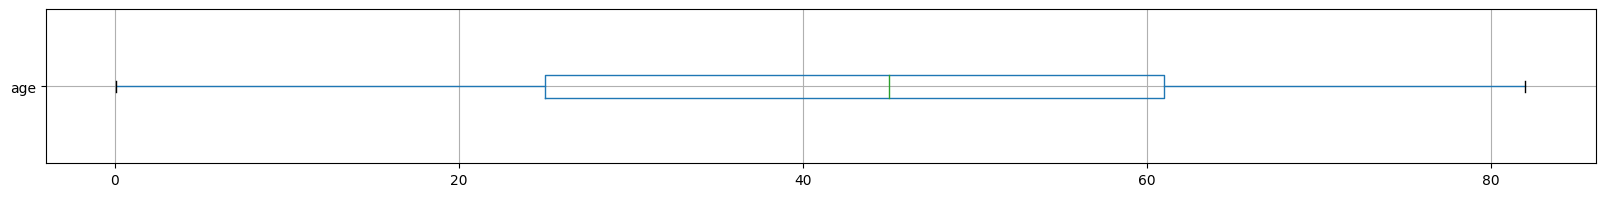

-Se detecta con Zscore > o < 3, valor de outliers para 'age' a partir de:


82.0

In [63]:
df.boxplot(column='age', return_type='axes', vert=False, figsize=(20,2))
plt.show()
print("-Se detecta con Zscore > o < 3, valor de outliers para 'age' a partir de:")
df = df[(np.abs(stats.zscore(df["age"])) < 3)]
df['age'].max()

* Outliers de glucosa 

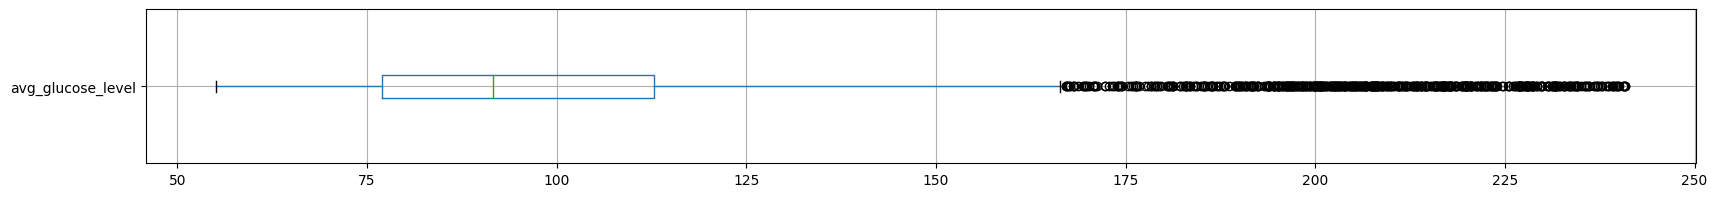

-Se detecta con Zscore > o < 3, valor de outliers para 'avg_glucose_level' a partir de:


232.89

In [69]:
df.boxplot(column='avg_glucose_level', return_type='axes', vert=False, figsize=(20,2))
plt.show()
print("-Se detecta con Zscore > o < 3, valor de outliers para 'avg_glucose_level' a partir de:")
df = df[(np.abs(stats.zscore(df["avg_glucose_level"])) < 3)]
df['avg_glucose_level'].max()

* Outliers de Masa Corporal

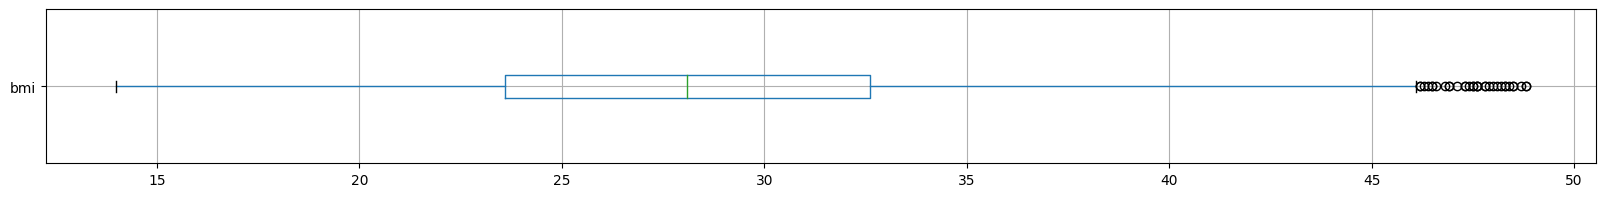

-Se detecta con Zscore > o < 3, valor de outliers para 'bmi' a partir de:


48.7

In [68]:
df.boxplot(column='bmi', return_type='axes', vert=False, figsize=(20,2))
plt.show()
print("-Se detecta con Zscore > o < 3, valor de outliers para 'bmi' a partir de:")
df = df[(np.abs(stats.zscore(df["bmi"])) < 3)]
df['bmi'].max()

In [78]:
numericas = ["female_gender", "age", "hypertension", "heart_disease", "ever_married", "urban_residence", "avg_glucose_level", "bmi", "stroke"]

In [100]:
corr_matrix = df[numericas].corr(method='pearson')
corr_matrix

,female_gender,age,hypertension,heart_disease,ever_married,urban_residence,avg_glucose_level,bmi,stroke
female_gender,1.000000,0.029904,-0.017199,-0.086102,0.030306,0.002549,-0.054368,0.012931,-0.001262
age,0.029904,1.000000,0.277226,0.262334,0.677939,0.018365,0.202848,0.375260,0.242911
hypertension,-0.017199,0.277226,1.000000,0.104283,0.160759,-0.002189,0.155796,0.154838,0.120489
heart_disease,-0.086102,0.262334,0.104283,1.000000,0.109872,0.005890,0.150133,0.062836,0.124118
ever_married,0.030306,0.677939,0.160759,0.109872,1.000000,0.007374,0.133600,0.372245,0.103883
urban_residence,0.002549,0.018365,-0.002189,0.005890,0.007374,1.000000,0.005058,0.014466,0.019128
avg_glucose_level,-0.054368,0.202848,0.155796,0.150133,0.133600,0.005058,1.000000,0.173355,0.114064
bmi,0.012931,0.375260,0.154838,0.062836,0.372245,0.014466,0.173355,1.000000,0.048878
stroke,-0.001262,0.242911,0.120489,0.124118,0.103883,0.019128,0.114064,0.048878,1.000000


In [101]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

tidy_corr_matrix(corr_matrix).head (50)

,variable_1,variable_2,r,abs_r
37,ever_married,age,0.677939,0.677939
13,age,ever_married,0.677939,0.677939
64,bmi,age,0.375260,0.375260
16,age,bmi,0.375260,0.375260
43,ever_married,bmi,0.372245,0.372245
67,bmi,ever_married,0.372245,0.372245
19,hypertension,age,0.277226,0.277226
11,age,hypertension,0.277226,0.277226
28,heart_disease,age,0.262334,0.262334
12,age,heart_disease,0.262334,0.262334


<AxesSubplot:>

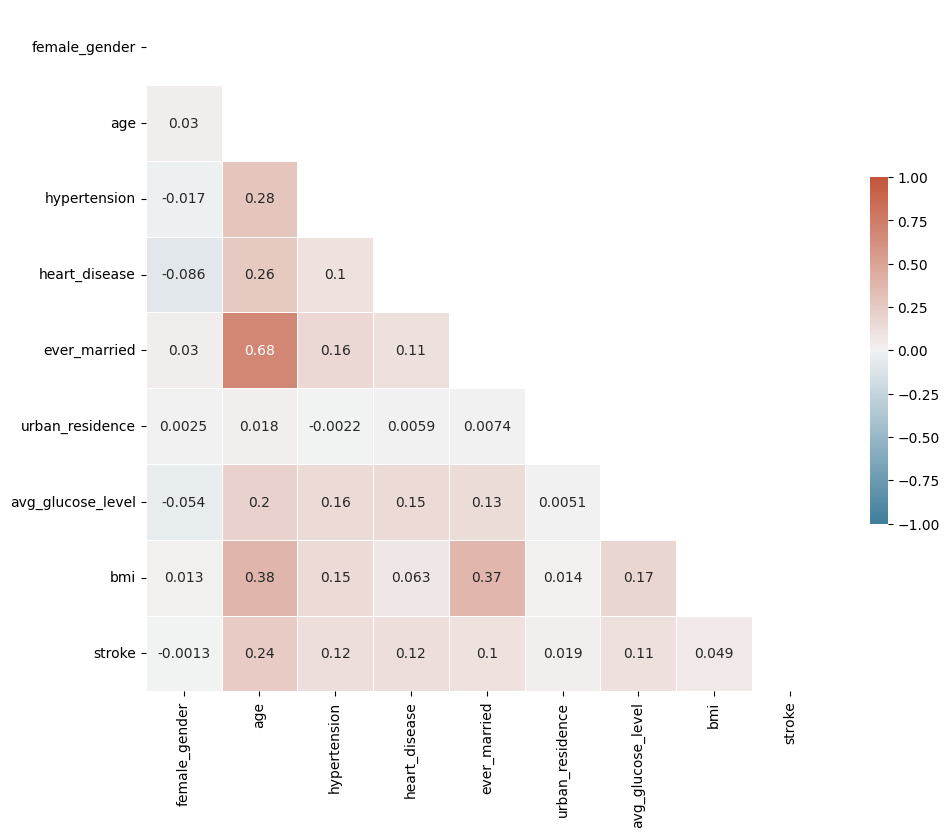

In [102]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1., vmin=-1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


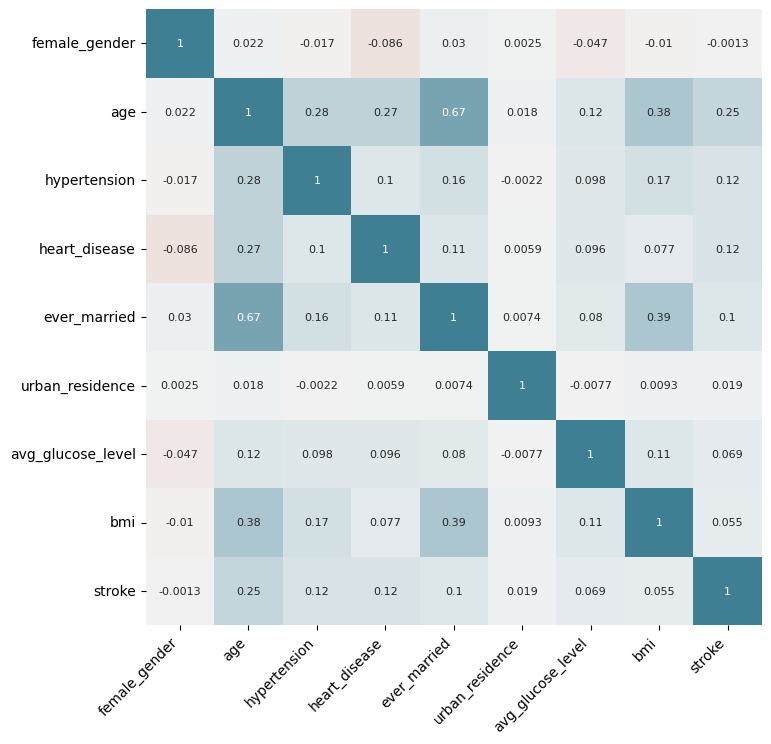

In [82]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

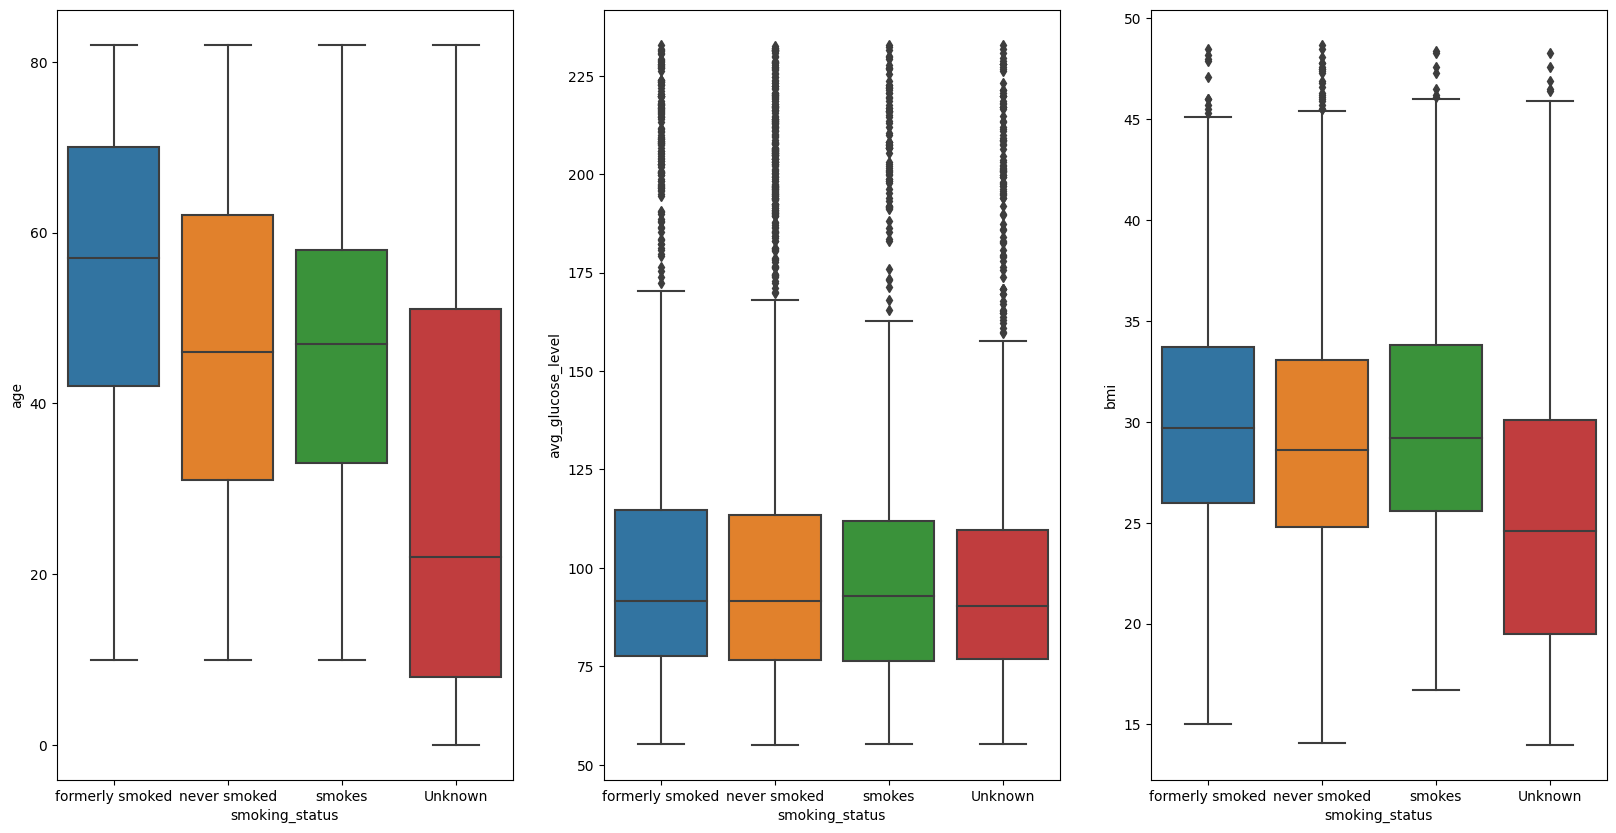

In [88]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))

plt.subplot(1,3,1)
sns.boxplot(x='smoking_status', y='age', data=df)
plt.ylim()

plt.subplot(1,3,2)
sns.boxplot(x='smoking_status', y='avg_glucose_level', data=df)
plt.ylim()

plt.subplot(1,3,3)
sns.boxplot(x='smoking_status', y='bmi', data=df)
plt.ylim()

plt.show()

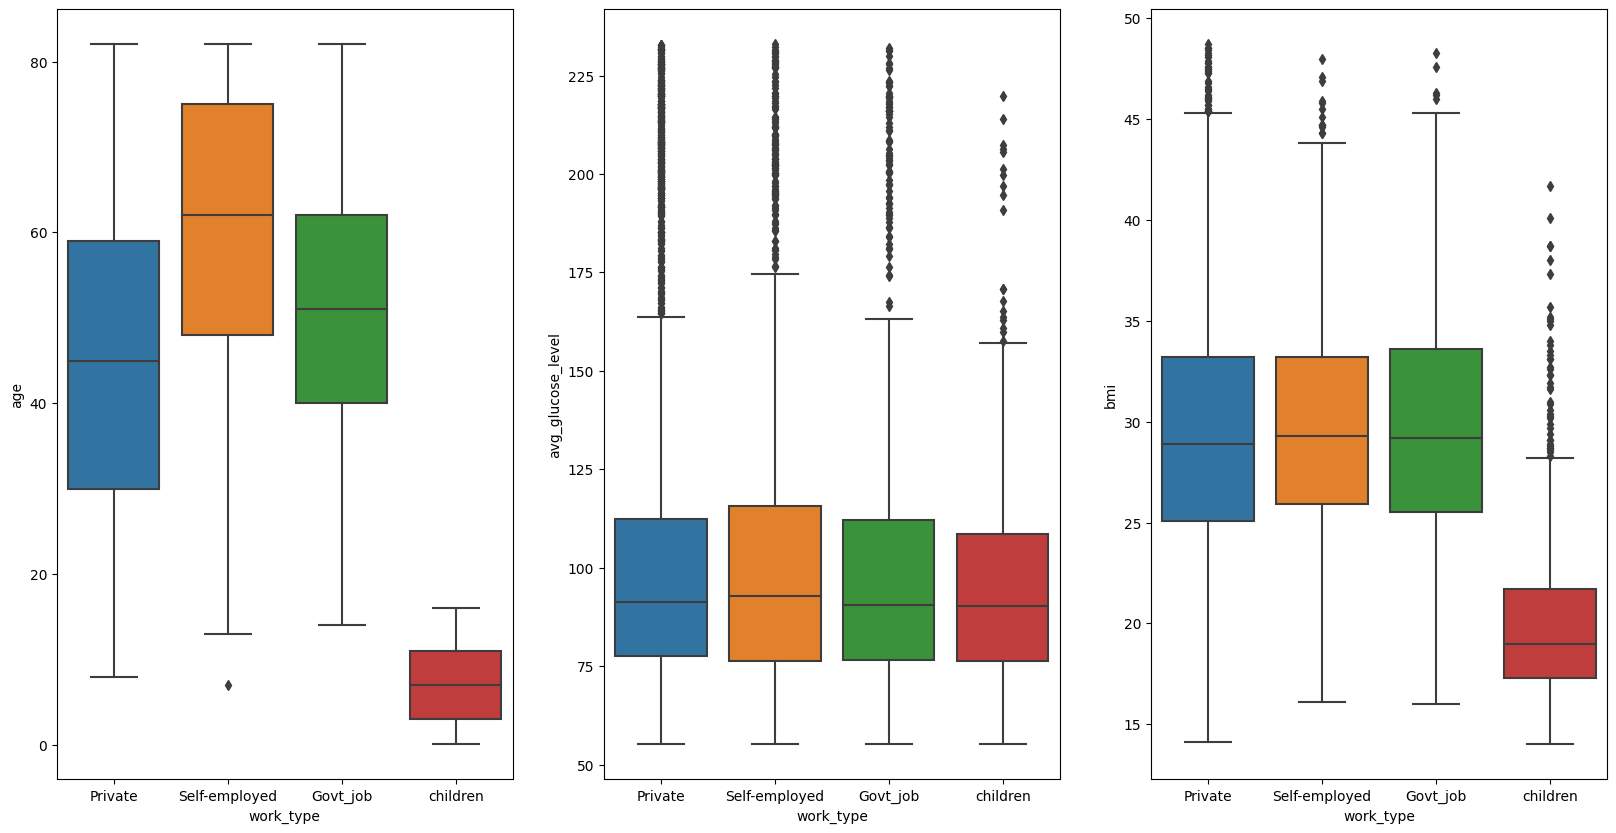

In [89]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))

plt.subplot(1,3,1)
sns.boxplot(x='work_type', y='age', data=df)
plt.ylim()

plt.subplot(1,3,2)
sns.boxplot(x='work_type', y='avg_glucose_level', data=df)
plt.ylim()

plt.subplot(1,3,3)
sns.boxplot(x='work_type', y='bmi', data=df)
plt.ylim()

plt.show()

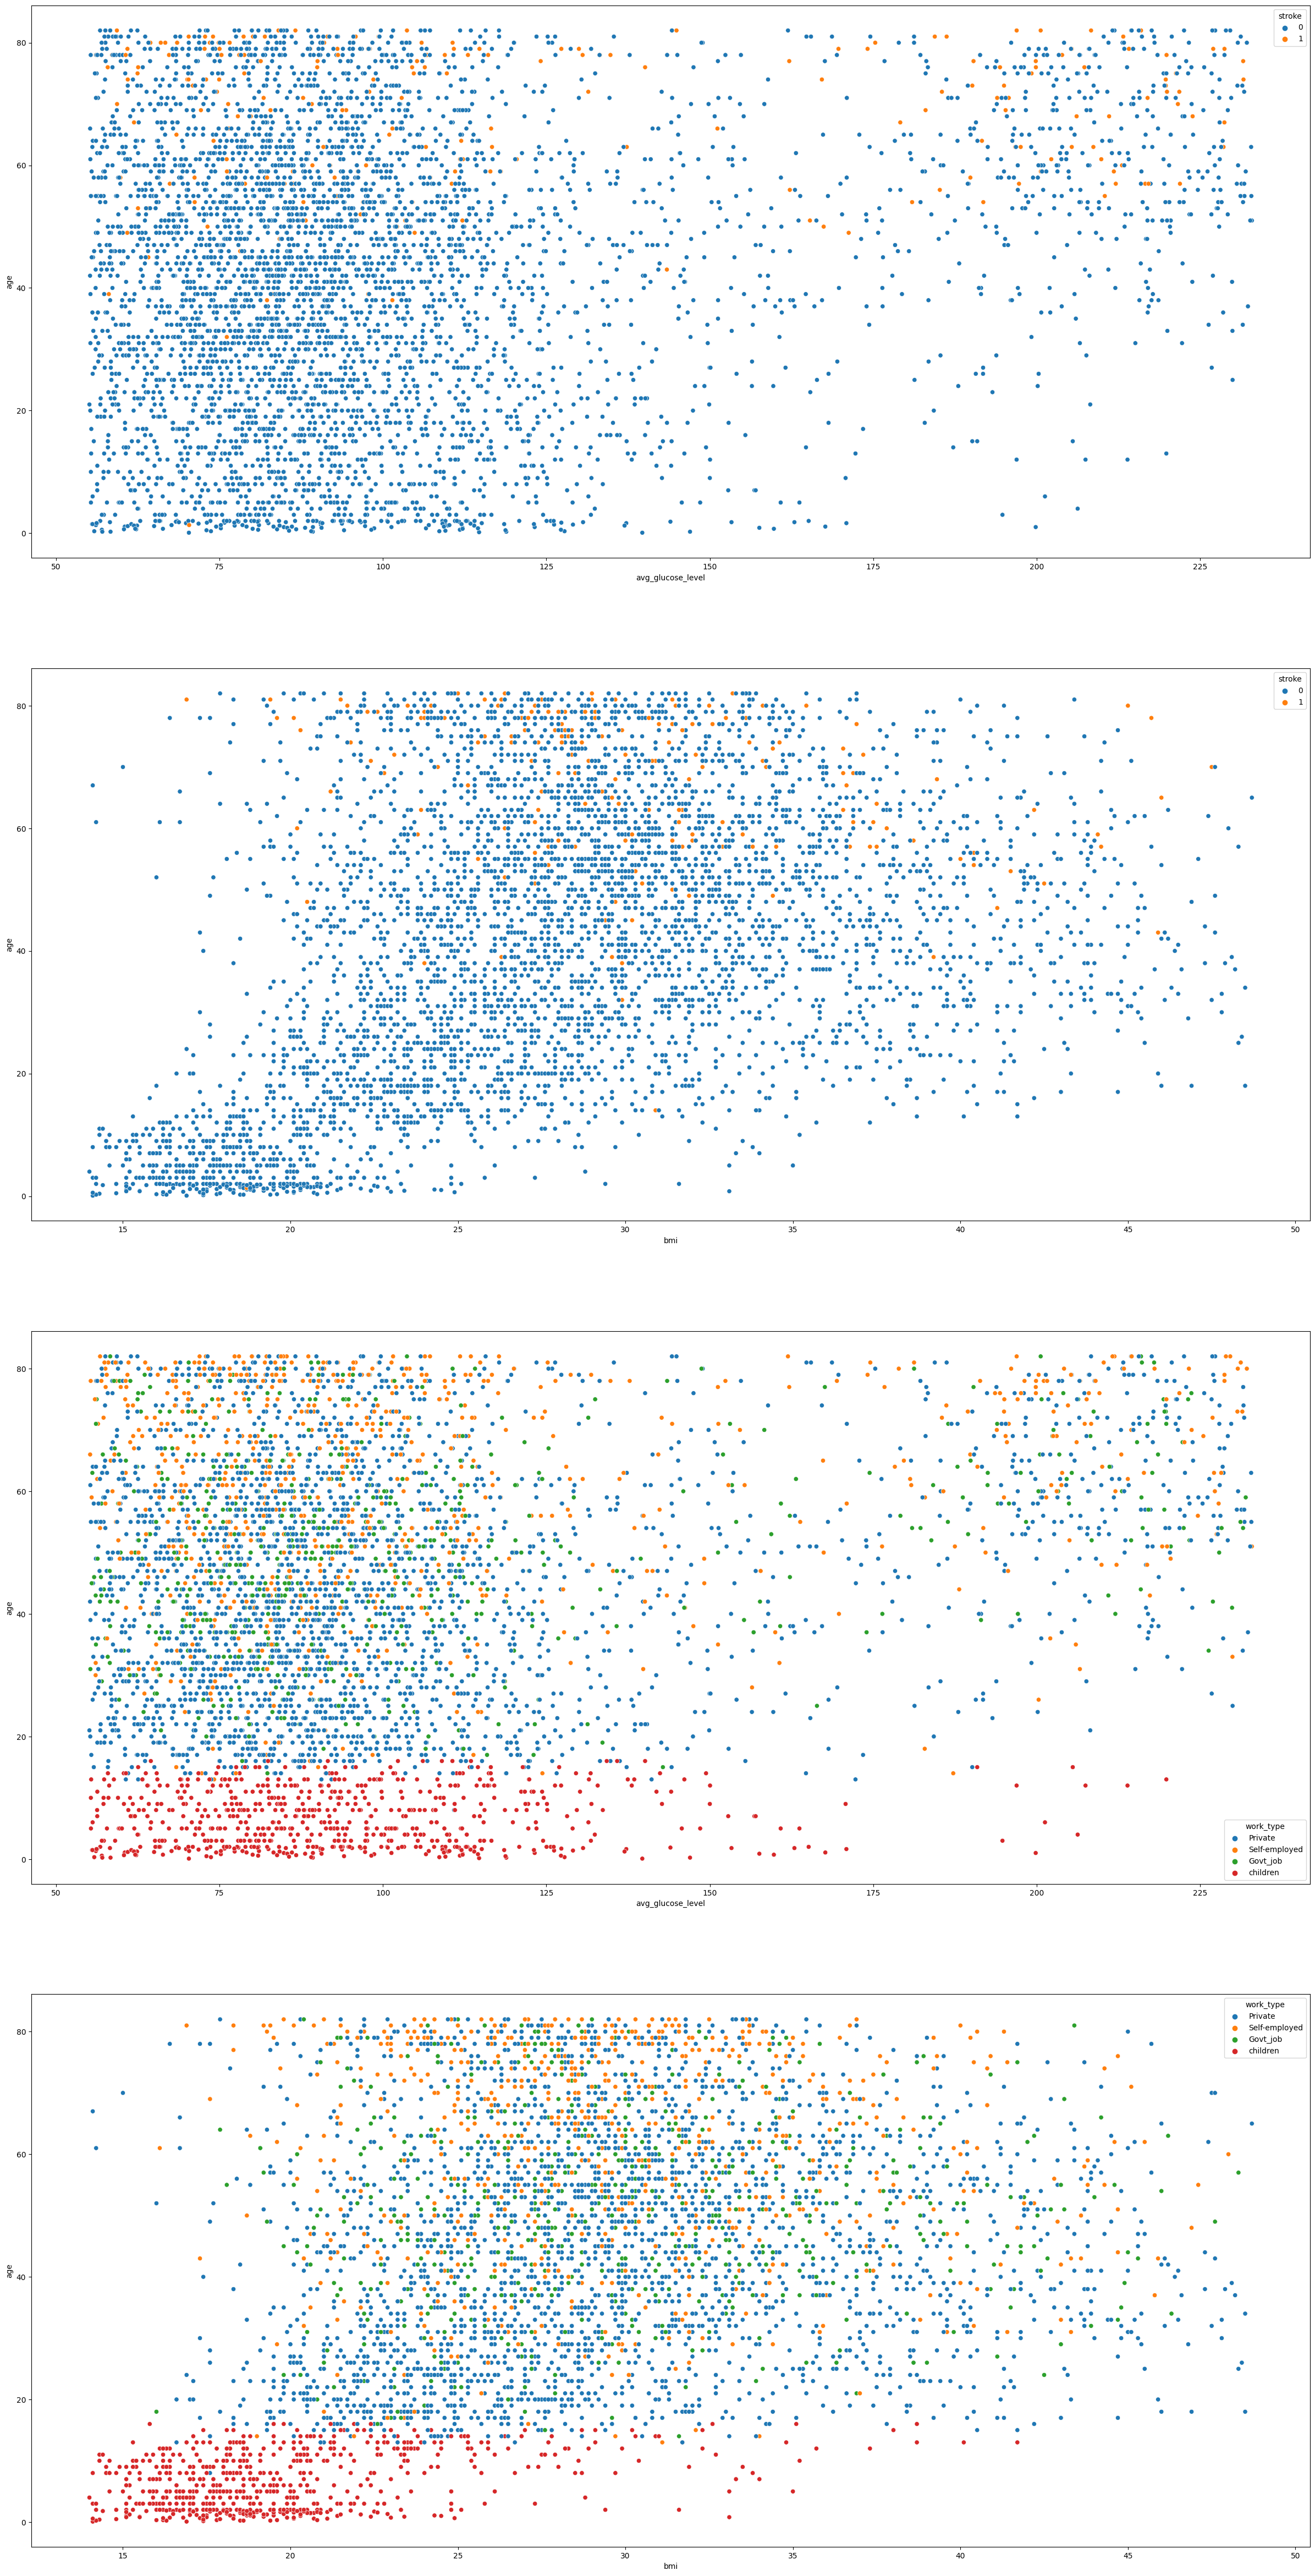

In [96]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(30, 60))

plt.subplot(4,1,1)
sns.scatterplot(x="avg_glucose_level", y="age", data=df, hue="stroke")
plt.ylim()

plt.subplot(4,1,2)
sns.scatterplot(x="bmi", y="age", data=df, hue="stroke")
plt.ylim()

plt.subplot(4,1,3)
sns.scatterplot(x="avg_glucose_level", y="age", data=df, hue="work_type")
plt.ylim()

plt.subplot(4,1,4)
sns.scatterplot(x="bmi", y="age", data=df, hue="work_type")
plt.ylim()

plt.show()

# Creación de colummnas

In [ ]:
#df['child'] = df['Age'].apply(lambda x: 1 if x>=1 and x<=14 else 0)
#    df['youth'] = df['Age'].apply(lambda x: 1 if x>=15 and x<=24 else 0)
#    df['adult'] = df['Age'].apply(lambda x: 1 if x>=25 and x<=64 else 0)
#    df['senior'] = df['Age'].apply(lambda x: 1 if x>=65 else 0)

In [104]:
# create a list of our conditions
conditions = [
    (df['age'] <= 2),
    (df['age'] > 2) & (df['age'] <= 25),
    (df['age'] > 25) & (df['age'] <= 45),
    (df['age'] > 45) & (df['age'] <= 60),
    (df['age'] > 60) & (df['age'] <= 70),
    (df['age'] > 70) & (df['age'] <= 77),
    (df['age'] > 77)
    ]

# create a list of the values we want to assign for each condition
values = ['Infante', 'Juventud', 'Adultez_25a45', 'Adultez_45a60', "Vejez_60a70", "Vejez_70a77", "Vejez_mas77"]

# create a new column and use np.select to assign values to it using our lists as arguments
df['rangos_edad'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,female_gender,age,hypertension,heart_disease,ever_married,work_type,urban_residence,avg_glucose_level,bmi,smoking_status,stroke,rangos_edad
0,0,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1,Vejez_60a70
1,0,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1,Vejez_mas77
2,1,49.0,0,0,1,Private,1,171.23,34.4,smokes,1,Adultez_45a60
3,1,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1,Vejez_mas77
4,0,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1,Vejez_mas77


In [107]:
df.rangos_edad.value_counts()

Adultez_25a45    1281
Adultez_45a60    1124
Juventud         1079
Vejez_60a70       557
Vejez_mas77       354
Vejez_70a77       320
Infante           168
Name: rangos_edad, dtype: int64

In [108]:
# create a list of our conditions
conditions = [
    (df['bmi'] <= 18.5),
    (df['bmi'] > 18.5) & (df['bmi'] <= 24.9),
    (df['bmi'] > 24.9) & (df['bmi'] <= 29.9),
    (df['bmi'] > 29.9) & (df['bmi'] <= 34.9),
    (df['bmi'] > 34.9) & (df['bmi'] <= 39.9),
    (df['bmi'] > 39.9)
    ]

# create a list of the values we want to assign for each condition
values = ['Bajo_peso', 'Normal', 'Sobrepeso', 'Obesidad_1', "Obesidad_2", "Obesidad_3"]

# create a new column and use np.select to assign values to it using our lists as arguments
df['IMC'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,female_gender,age,hypertension,heart_disease,ever_married,work_type,urban_residence,avg_glucose_level,bmi,smoking_status,stroke,rangos_edad,IMC
0,0,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1,Vejez_60a70,Obesidad_2
1,0,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1,Vejez_mas77,Obesidad_1
2,1,49.0,0,0,1,Private,1,171.23,34.4,smokes,1,Adultez_45a60,Obesidad_1
3,1,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1,Vejez_mas77,Normal
4,0,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1,Vejez_mas77,Sobrepeso


In [109]:
df.IMC.value_counts()

Sobrepeso     1461
Normal        1228
Obesidad_1    1070
Obesidad_2     489
Bajo_peso      331
Obesidad_3     304
Name: IMC, dtype: int64

In [110]:
# create a list of our conditions
conditions = [
    (df['avg_glucose_level'] <= 100),
    (df['avg_glucose_level'] > 100) & (df['avg_glucose_level'] <= 125),
    (df['avg_glucose_level'] > 125)
    ]

# create a list of the values we want to assign for each condition
values = ['Normal', 'Prediabetico', 'Diabetico']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Diabetes'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,female_gender,age,hypertension,heart_disease,ever_married,work_type,urban_residence,avg_glucose_level,bmi,smoking_status,stroke,rangos_edad,IMC,Diabetes
0,0,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1,Vejez_60a70,Obesidad_2,Diabetico
1,0,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1,Vejez_mas77,Obesidad_1,Prediabetico
2,1,49.0,0,0,1,Private,1,171.23,34.4,smokes,1,Adultez_45a60,Obesidad_1,Diabetico
3,1,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1,Vejez_mas77,Normal,Diabetico
4,0,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1,Vejez_mas77,Sobrepeso,Diabetico


In [111]:
df.Diabetes.value_counts()

Normal          3057
Prediabetico     956
Diabetico        870
Name: Diabetes, dtype: int64

In [112]:
categoricas = ["rangos_edad", "work_type","Diabetes","IMC","smoking_status"]

In [114]:
df=df[["female_gender", "age", "rangos_edad", "hypertension", "heart_disease", "ever_married", "work_type", "urban_residence", "avg_glucose_level", "Diabetes", "bmi", "IMC", "smoking_status", "stroke"]]

# MODELOS PREDICTIVOS

## TRANSFORMACION DATOS

In [118]:
numericas_no_bool = ["age", "avg_glucose_level", "bmi"]

['age', 'avg_glucose_level', 'bmi']

In [172]:
df=df.drop((["age", "avg_glucose_level", "bmi"]), axis=1)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4883 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   female_gender    4883 non-null   int32 
 1   rangos_edad      4883 non-null   object
 2   hypertension     4883 non-null   int64 
 3   heart_disease    4883 non-null   int64 
 4   ever_married     4883 non-null   int32 
 5   work_type        4883 non-null   object
 6   urban_residence  4883 non-null   int32 
 7   Diabetes         4883 non-null   object
 8   IMC              4883 non-null   object
 9   smoking_status   4883 non-null   object
 10  stroke           4883 non-null   int64 
dtypes: int32(3), int64(3), object(5)
memory usage: 400.6+ KB


In [174]:
X = df.drop("stroke", axis=1)
y = df["stroke"]

In [180]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

#transformer_numerico = ("transformer_numerico", MinMaxScaler(), numericas_no_bool)
transformer_categorico = ("transformer_categorico", OneHotEncoder(), categoricas)

transformer = ColumnTransformer([transformer_categorico], remainder="passthrough")

In [181]:
X = transformer.fit_transform(X)

In [182]:
X = pd.DataFrame(X, columns = transformer.get_feature_names_out())

In [183]:
transformer.output_indices_

{'transformer_categorico': slice(0, 24, None),
 'remainder': slice(24, 29, None)}

In [184]:
from sklearn.model_selection import train_test_split

X_tra, X_val, y_tra, y_val = train_test_split(X, y, random_state = 42, test_size = 0.1 , stratify = y )

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X_tra, y_tra, random_state = 42, test_size = 0.1 , stratify = y_tra )

In [186]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

import xgboost as xgb
import lightgbm 
import catboost
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

import multiprocessing
from multiprocessing import Pool
from sklearn.model_selection import RepeatedKFold

In [187]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [188]:
def train_evaluate(nombre_modelo, modelo):
    mod=modelo()
    mod.fit(X_train, y_train)

    y_predict = mod.predict(X_test)

    con_matrix = confusion_matrix(y_test, y_predict)
    accur = accuracy_score(y_test, y_predict)
    preci = precision_score(y_test, y_predict)
    recal = recall_score(y_test, y_predict)
    f1 = f1_score(y_test, y_predict)
    class_repor = classification_report(y_test, y_predict)

    y_pred_train= mod.predict(X_train)

    accur_train = accuracy_score(y_train, y_pred_train)
    preci_train = precision_score(y_train, y_pred_train)
    recal_train = recall_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train)

    print(nombre_modelo)
    print()
    print(f"Matriz de Confusión:")
    print()
    print(con_matrix)
    print()
    print(f"Accuracy: {accur}")
    print(f"Precision: {preci}")
    print(f"Recall: {recal}")
    print(f"F1_score: {f1}")
    print()
    print(f"Reporte de Clasificación:")
    print()
    print(class_repor)
    print()
    print(f"accuracy_score_train: {accur_train}")
    print(f"precision_score_train: {preci_train}")
    print(f"recall_score_train: {recal_train}")
    print(f"f1_score_train: {f1_train}")
    print()

In [189]:
train_evaluate("KNeighborsClassifier",KNeighborsClassifier )
train_evaluate("SVC",SVC )
train_evaluate("DecisionTreeClassifier",DecisionTreeClassifier )
train_evaluate("LogisticRegression",LogisticRegression )
train_evaluate("LinearDiscriminantAnalysis",LinearDiscriminantAnalysis )
train_evaluate("GaussianNB",GaussianNB )

train_evaluate("GradientBoostingClassifier",GradientBoostingClassifier )
train_evaluate("XGBClassifier",XGBClassifier )
train_evaluate("RandomForestClassifier",RandomForestClassifier )
train_evaluate("AdaBoostClassifier",AdaBoostClassifier )

KNeighborsClassifier

Matriz de Confusión:

[[417   2]
 [ 21   0]]

Accuracy: 0.9477272727272728
Precision: 0.0
Recall: 0.0
F1_score: 0.0

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       419
           1       0.00      0.00      0.00        21

    accuracy                           0.95       440
   macro avg       0.48      0.50      0.49       440
weighted avg       0.91      0.95      0.93       440


accuracy_score_train: 0.9537177541729894
precision_score_train: 0.6923076923076923
recall_score_train: 0.047872340425531915
f1_score_train: 0.08955223880597016

SVC

Matriz de Confusión:

[[419   0]
 [ 21   0]]

Accuracy: 0.9522727272727273
Precision: 0.0
Recall: 0.0
F1_score: 0.0

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       419
           1       0.00      0.00      0.00        21

    accuracy                    

In [190]:
arbol_decision = DecisionTreeClassifier().fit(X_train, y_train)

In [191]:
arbol_decision.feature_importances_

array([0.        , 0.01546992, 0.        , 0.00015662, 0.01968452,
       0.03371672, 0.04726481, 0.0222042 , 0.04015503, 0.03464969,
       0.00038196, 0.03274463, 0.08326544, 0.04251391, 0.00487002,
       0.02730292, 0.04226037, 0.03420111, 0.02799685, 0.04410517,
       0.06380322, 0.03561454, 0.03123252, 0.01066483, 0.08023579,
       0.0489356 , 0.04169301, 0.04375251, 0.09112409])

In [192]:
arbol_decision.feature_names_in_

array(['transformer_categorico__rangos_edad_Adultez_25a45',
       'transformer_categorico__rangos_edad_Adultez_45a60',
       'transformer_categorico__rangos_edad_Infante',
       'transformer_categorico__rangos_edad_Juventud',
       'transformer_categorico__rangos_edad_Vejez_60a70',
       'transformer_categorico__rangos_edad_Vejez_70a77',
       'transformer_categorico__rangos_edad_Vejez_mas77',
       'transformer_categorico__work_type_Govt_job',
       'transformer_categorico__work_type_Private',
       'transformer_categorico__work_type_Self-employed',
       'transformer_categorico__work_type_children',
       'transformer_categorico__Diabetes_Diabetico',
       'transformer_categorico__Diabetes_Normal',
       'transformer_categorico__Diabetes_Prediabetico',
       'transformer_categorico__IMC_Bajo_peso',
       'transformer_categorico__IMC_Normal',
       'transformer_categorico__IMC_Obesidad_1',
       'transformer_categorico__IMC_Obesidad_2',
       'transformer_categorico_

<AxesSubplot:xlabel='x'>

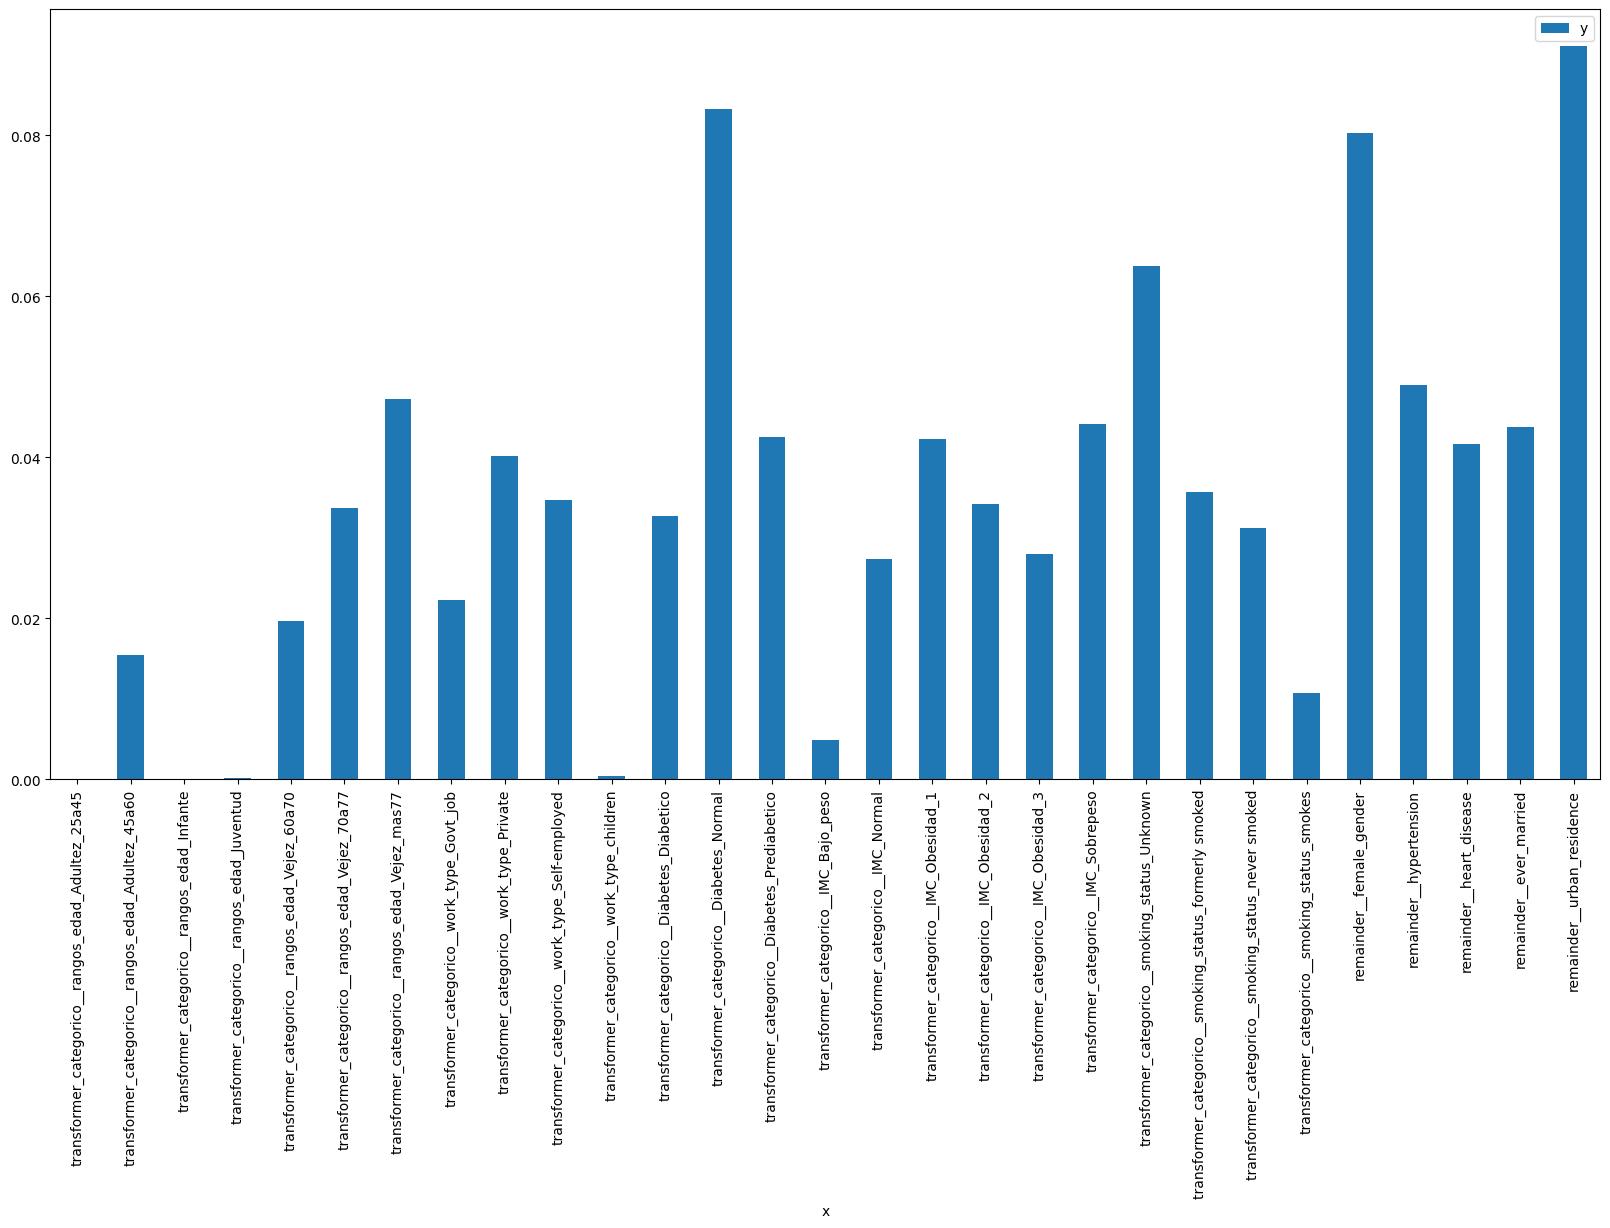

In [194]:
x = arbol_decision.feature_names_in_
y = arbol_decision.feature_importances_
df_AD = pd.DataFrame({'x':x, 'y':y})
df_AD.plot('x', 'y', kind='bar', figsize=(20,10))